<font size="2" color="Black"><b>Authors : Puneet<b><font><br><font size="2" color="black">Created : Sep, 2022 <font><br><font size="2" color="Black">
## Car Price Prediction

The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
 <font>
<div align="center"> <font size="2" color="red"><b><!--# For Citi Internal training purpose only #--></b></font> </div>

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
cars = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  # default='warn' (to supress warning in outlier treatment capping)
np.seterr(divide='ignore') #Ignore runtime warning in VIF (for division of zero)
pd.options.display.max_rows = 4000  #(For avoiding results geting truncated)

In [ ]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Lets look at the first 5 rows of he dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#checking data type for each colunmn (Keep a mental note of what should be interger and what should be categorical)
#should Car ID be integer?
#Why number of doors are object?
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [ ]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts().sort_index()

-2     3
-1    22
0     67
1     54
2     32
3     27
Name: symboling, dtype: int64

In [ ]:
cars.groupby('symboling')['price'].agg('mean').round(decimals=1)

symboling
-2    15781.7
-1    17330.7
 0    14367.0
 1    10037.9
 2    10109.3
 3    17221.3
Name: price, dtype: float64

In [ ]:
# aspiration: An (internal combustion) engine property showing
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

#Takeaway: There are more number of cars with standard aspiration vs number of cars with Turbo aspiration.
#Is turbo car more expensive? Looks like an exclusive feature

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
#Lets check the price of the car by "aspiration" type
#cars.groupby('aspiration')[['price']].mean()
#cars.groupby('aspiration')[['price']].agg('mean') #When you want to use multiple columns with "price"
#cars.groupby('aspiration')['price'].agg('mean') #when you just want avg of price
cars.groupby('aspiration')['price'].agg('mean').round(decimals=2) #when you need to round up the output to only 2 decimal places

aspiration
std      12611.27
turbo    16298.17
Name: price, dtype: float64

In [ ]:
# drivewheel: frontwheel, rarewheel or four-wheel drive
cars['drivewheel'].astype('category').value_counts()

#Takeaway: Looks like "4wd" drive car are rare

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
cars.groupby('drivewheel')['price'].agg('mean').round(decimals=1)
#Google: which car is more expensive forward wheel or rear wheel drive

drivewheel
4wd    11087.5
fwd     9239.3
rwd    19910.8
Name: price, dtype: float64

<ipython-input-13-14ae02024d2e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['wheelbase'])


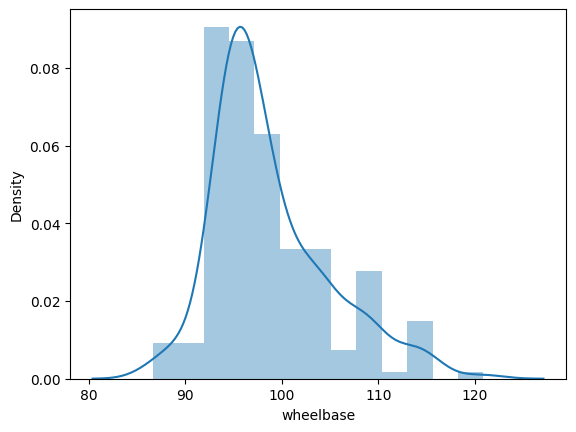

In [ ]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

<ipython-input-14-9479063d56f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['curbweight'])


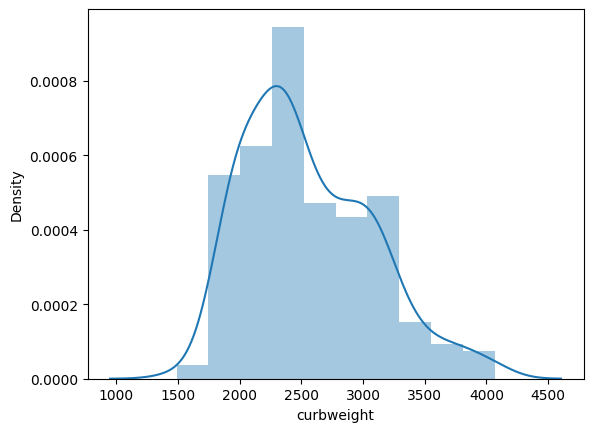

In [ ]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

<ipython-input-15-a35bb18d6a32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['stroke'])


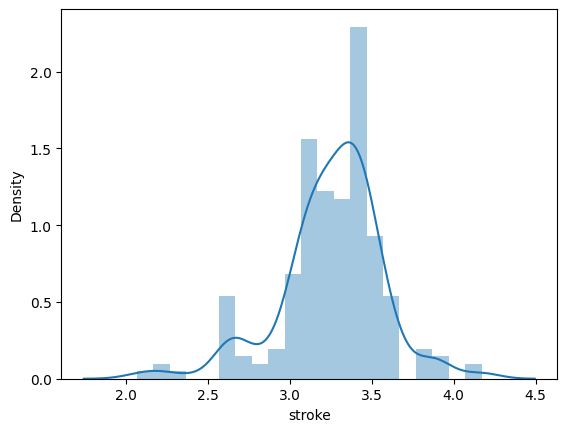

In [ ]:
# stroke: volume of the engine (the distance traveled by the
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

<ipython-input-16-c663d37b3566>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['compressionratio'])


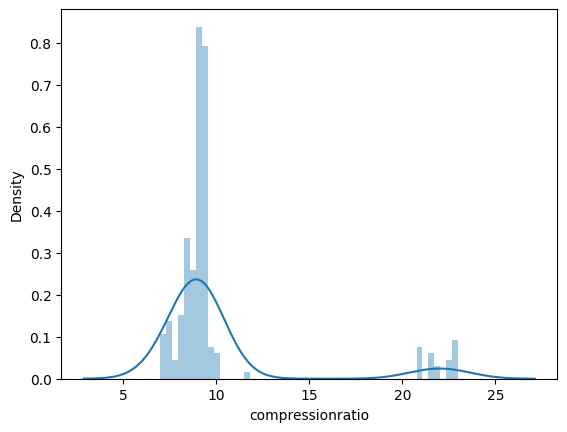

In [ ]:
# compression ratio: ratio of volume of compression chamber
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

<ipython-input-17-17e3b5d273f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


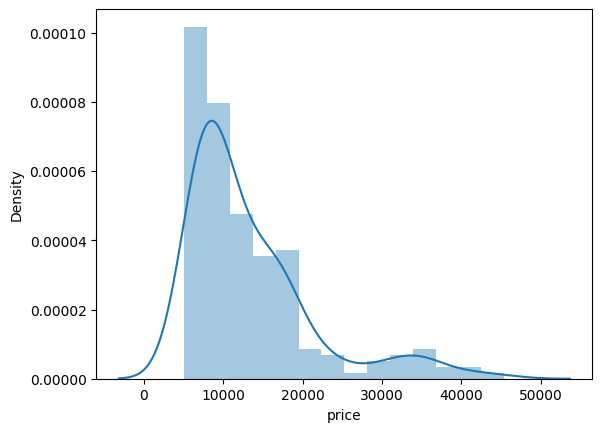

In [ ]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [ ]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [ ]:
# dropping symboling and car_ID
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 2000x1000 with 0 Axes>

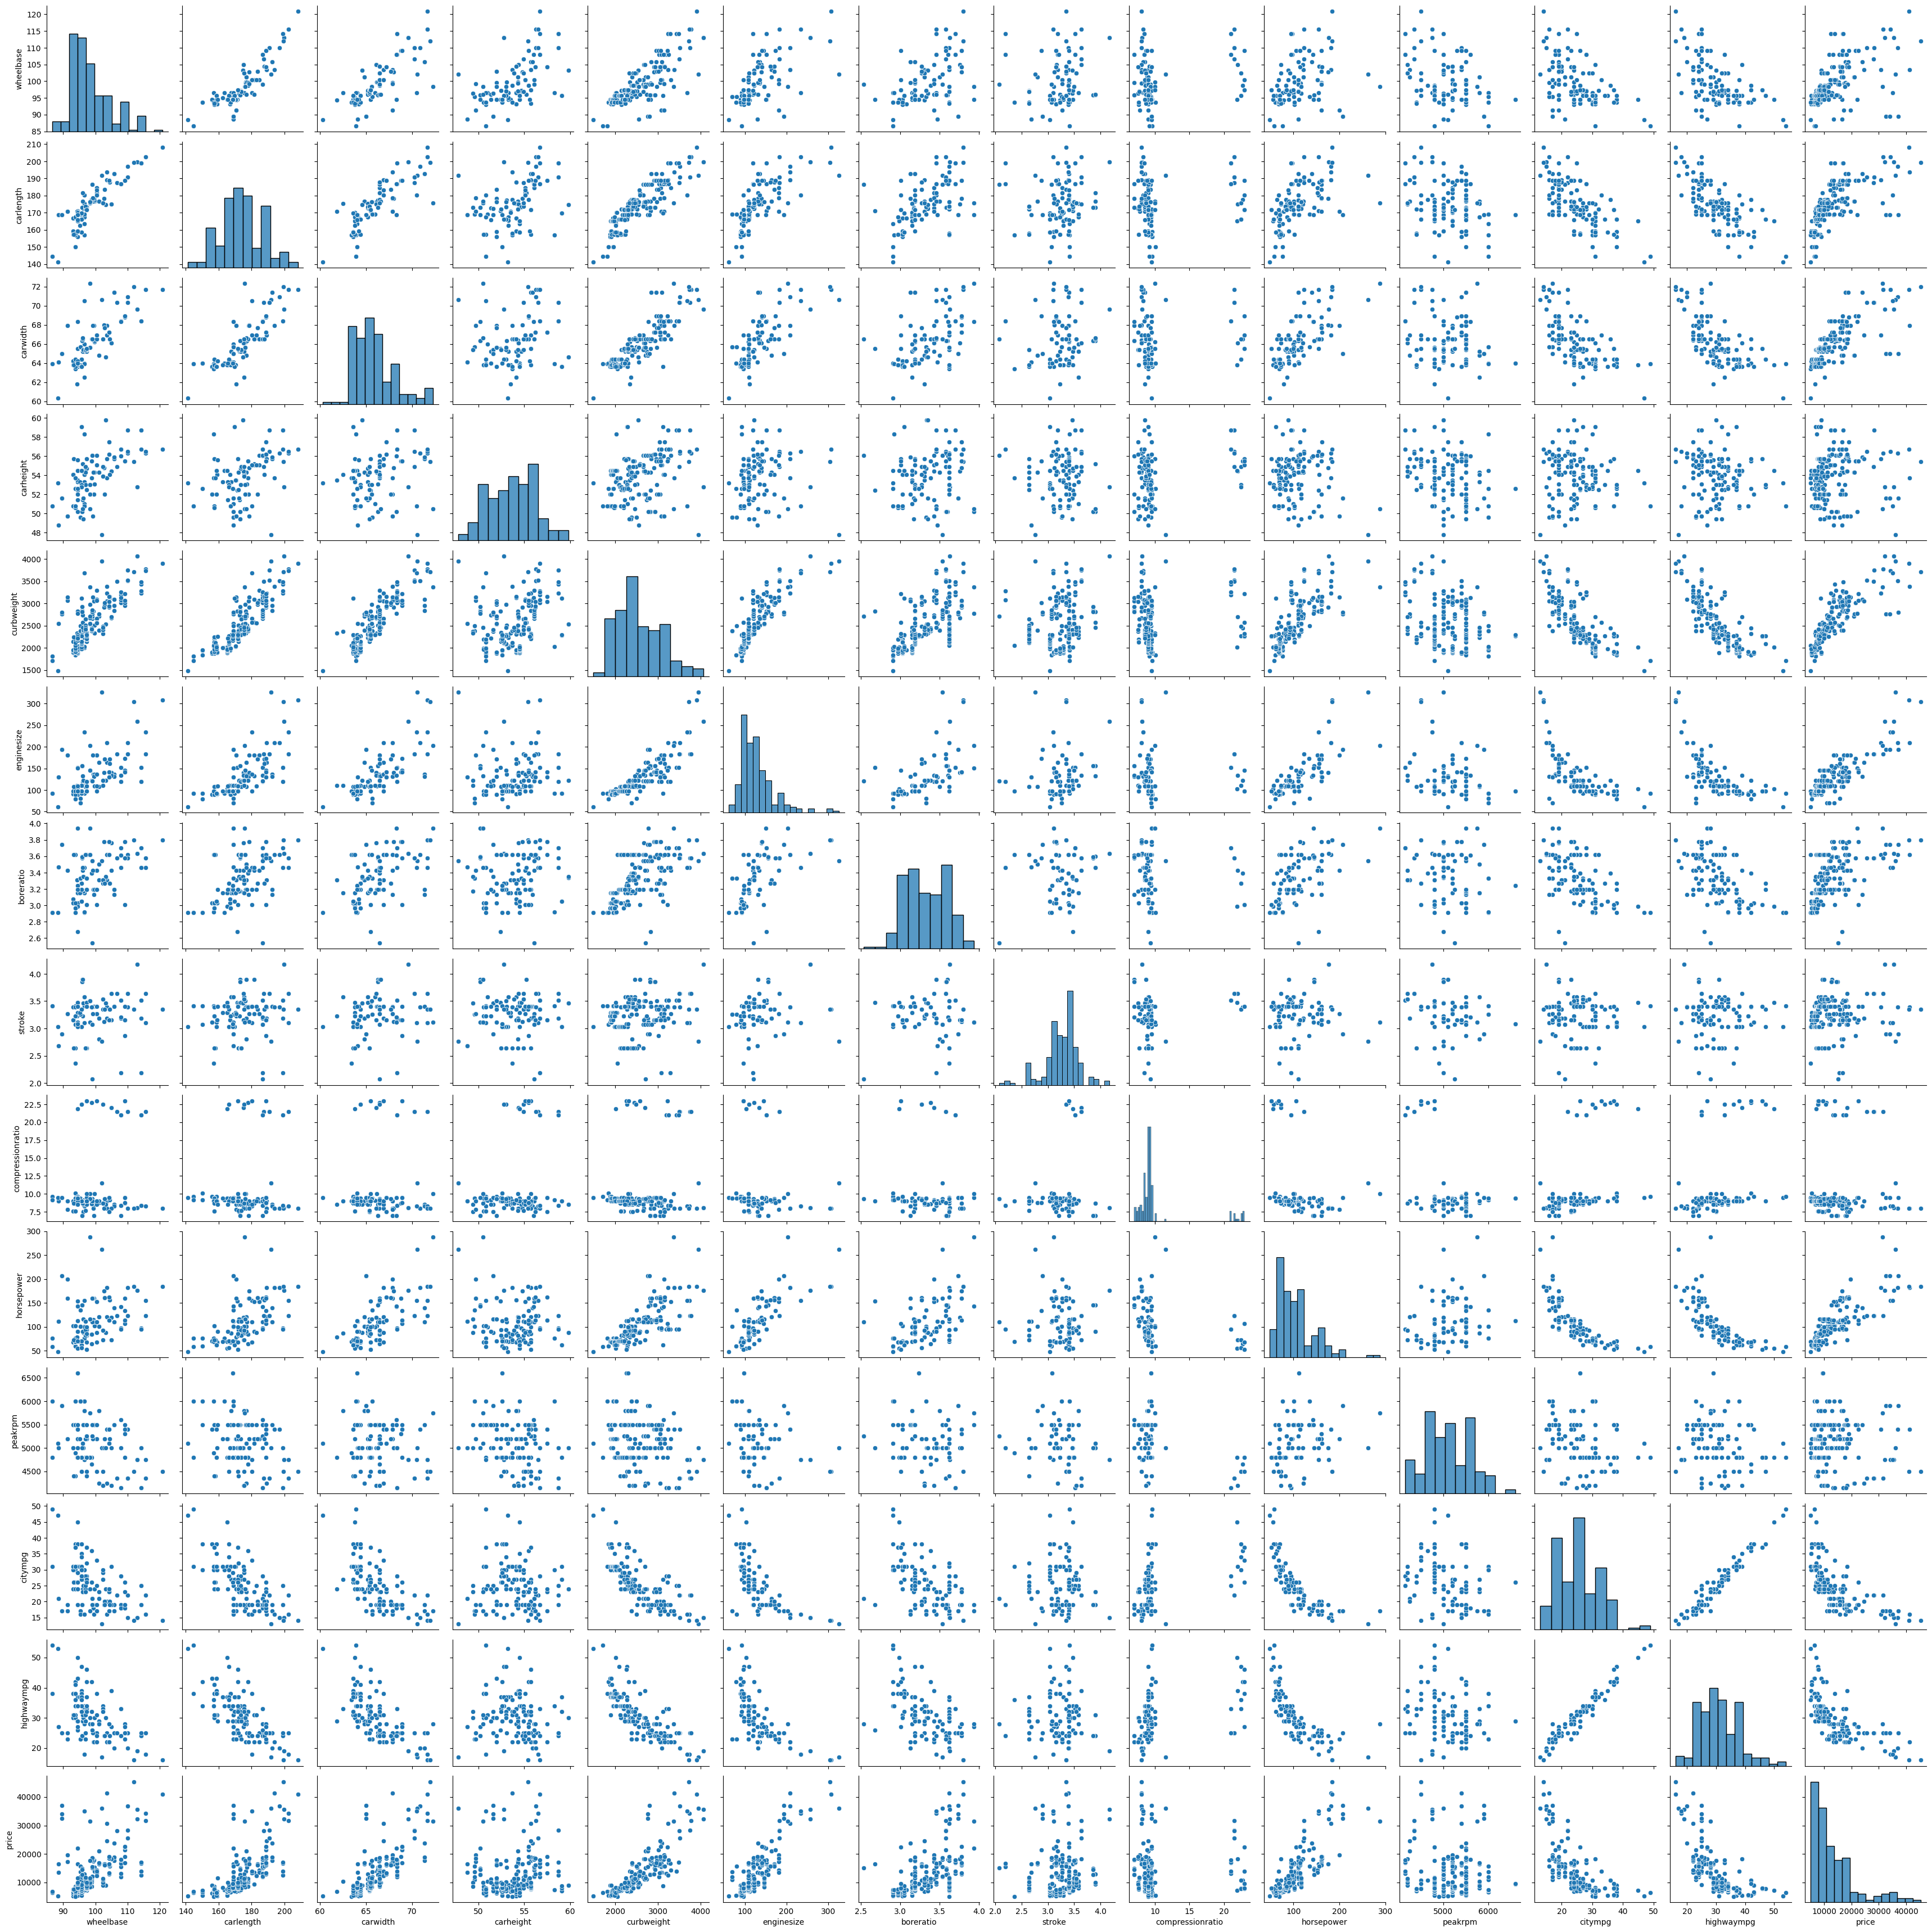

In [ ]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

In [ ]:
#sns.pairplot(cars,diag_kind='kde')

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor.round(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07
horsepower,0.35,0.55,0.64,-0.11,0.75,0.81,0.57,0.08,-0.20,1.00,0.13,-0.80,-0.77,0.81


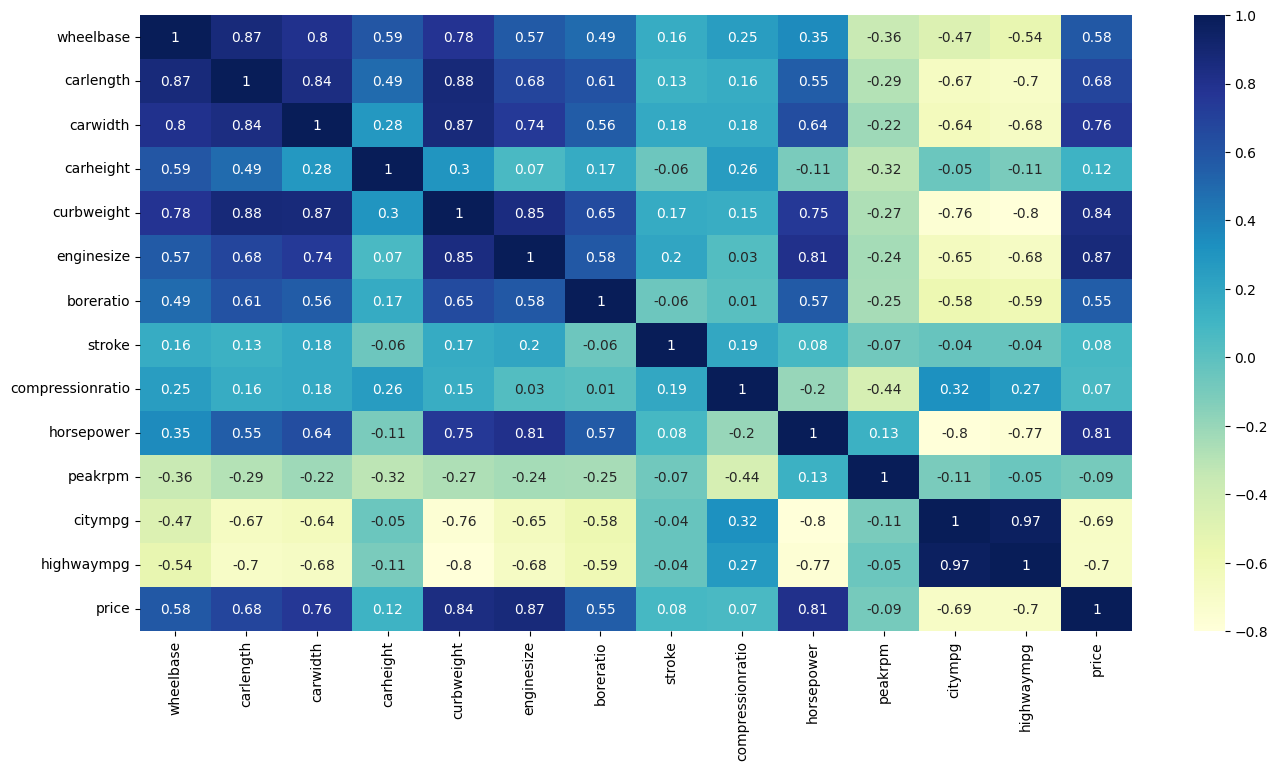

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap: 1
#sns.heatmap(cor)
# heatmap: 2
#sns.heatmap(cor, cmap="YlGnBu")
# heatmap: 3
sns.heatmap(cor.round(2), cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also.



In [ ]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Next, we need to extract the company name from the column ```CarName```.

In [ ]:
# CarName: first few entries
cars['CarName']

0                   alfa-romero giulia
1                  alfa-romero stelvio
2             alfa-romero Quadrifoglio
3                          audi 100 ls
4                           audi 100ls
5                             audi fox
6                           audi 100ls
7                            audi 5000
8                            audi 4000
9                  audi 5000s (diesel)
10                            bmw 320i
11                            bmw 320i
12                              bmw x1
13                              bmw x3
14                              bmw z4
15                              bmw x4
16                              bmw x5
17                              bmw x3
18                    chevrolet impala
19               chevrolet monte carlo
20                 chevrolet vega 2300
21                       dodge rampage
22                 dodge challenger se
23                          dodge d200
24                   dodge monaco (sw)
25                  dodge

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.




In [ ]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

Let's create a new column to store the compnay name and check whether it looks okay.

In [ ]:
# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

In [ ]:
# look at all values
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [ ]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") |
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [ ]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [ ]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
# outliers
cars.describe().round(1)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,98.8,174.0,65.9,53.7,2555.6,126.9,3.3,3.3,10.1,104.1,5125.1,25.2,30.8,13276.7
std,59.3,6.0,12.3,2.1,2.4,520.7,41.6,0.3,0.3,4.0,39.5,477.0,6.5,6.9,7988.9
min,1.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,94.5,166.3,64.1,52.0,2145.0,97.0,3.2,3.1,8.6,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.3,3.3,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,102.4,183.1,66.9,55.5,2935.0,141.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0,16503.0
max,205.0,120.9,208.1,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,288.0,6600.0,49.0,54.0,45400.0


### Missing value and Outlier detection

In [ ]:
cars.isnull().any()

car_ID              False
symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
car_company         False
dtype: bool

### No missing values in  any columns

In [ ]:
# car_df_final_imp=cars.fillna(cars.median())

In [ ]:
#To supress unnecessary warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


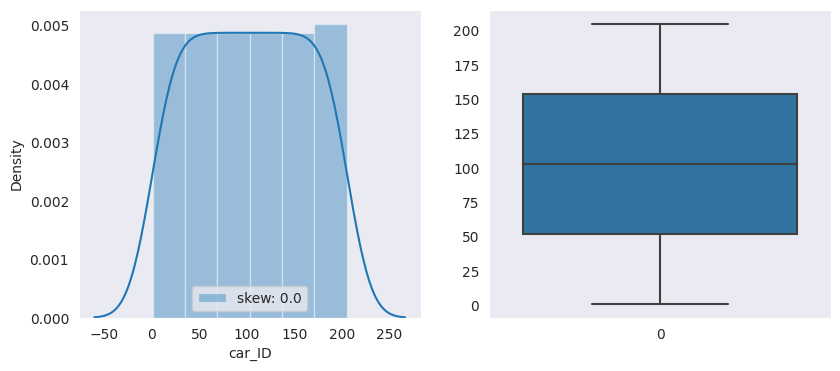

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


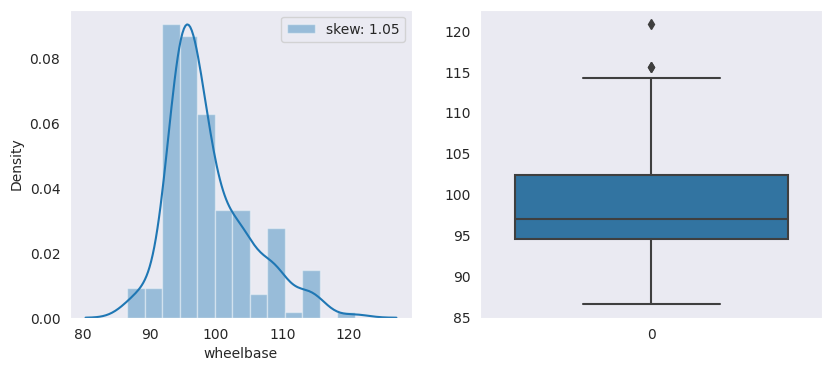

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


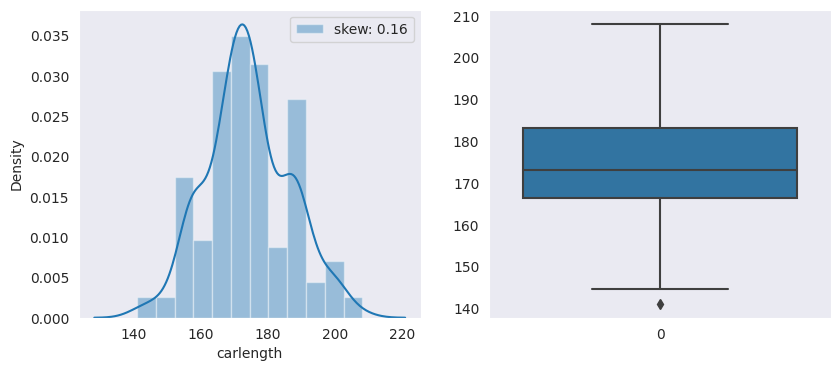

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


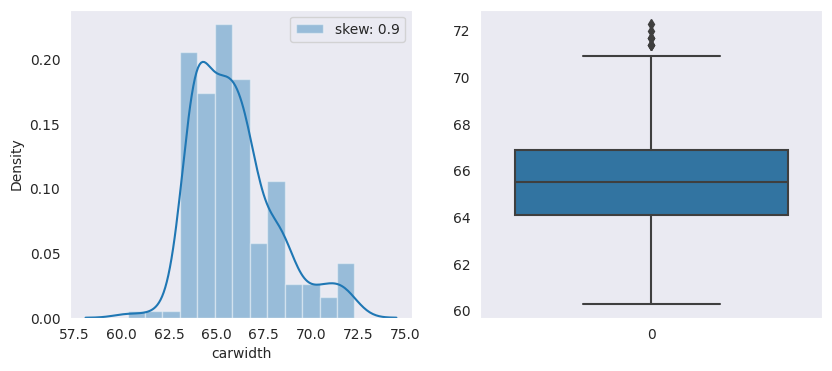

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


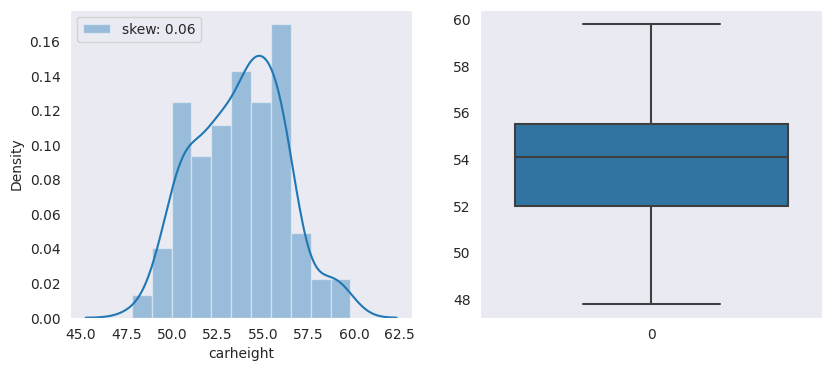

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


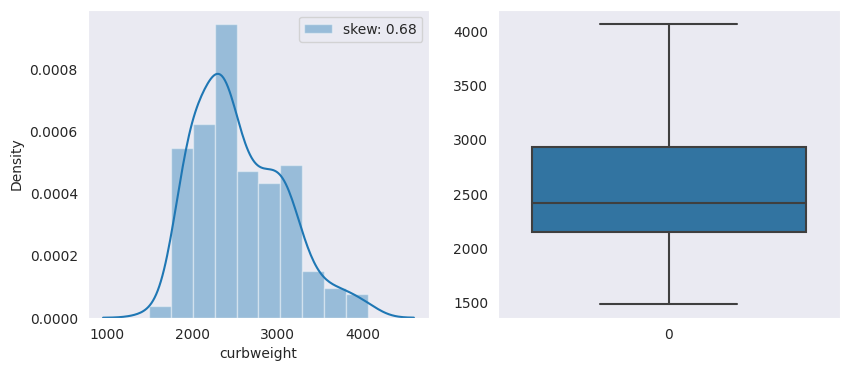

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


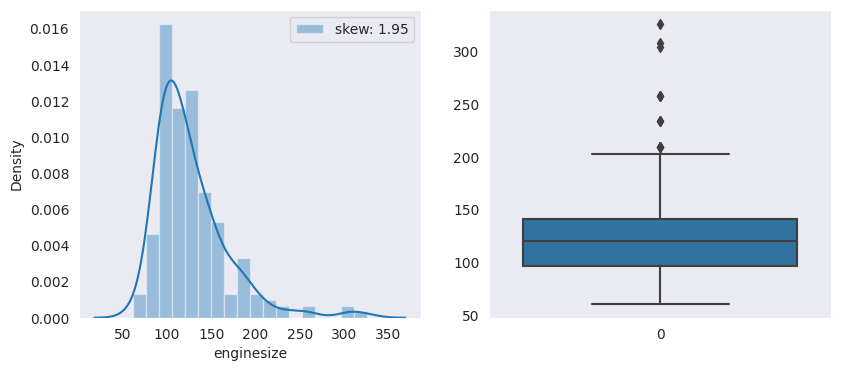

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


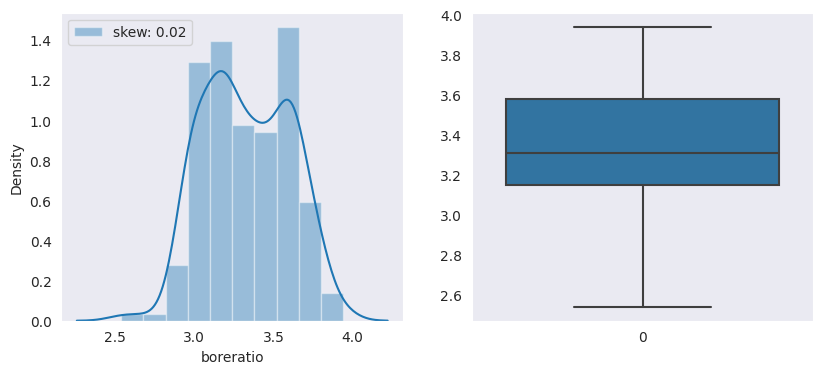

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


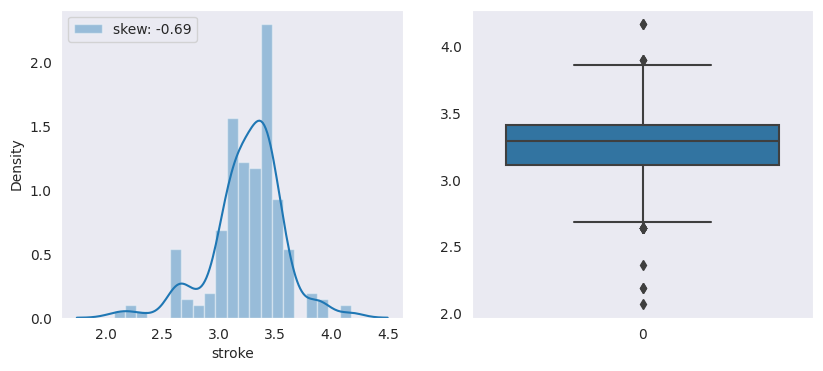

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


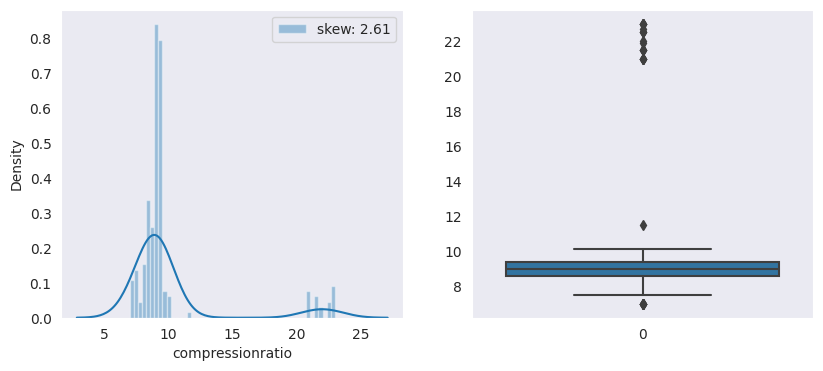

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


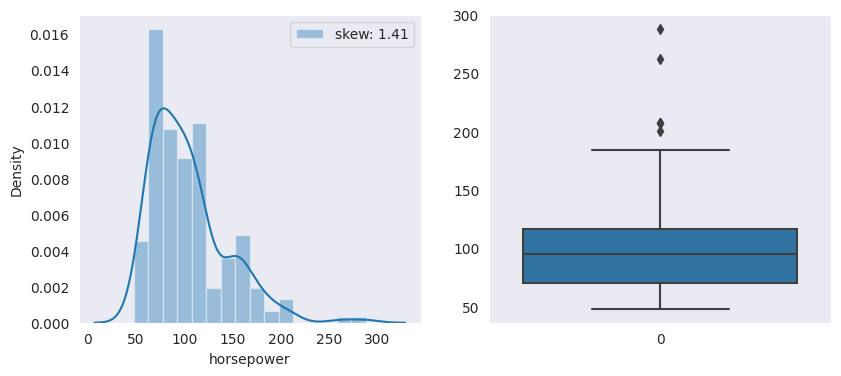

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


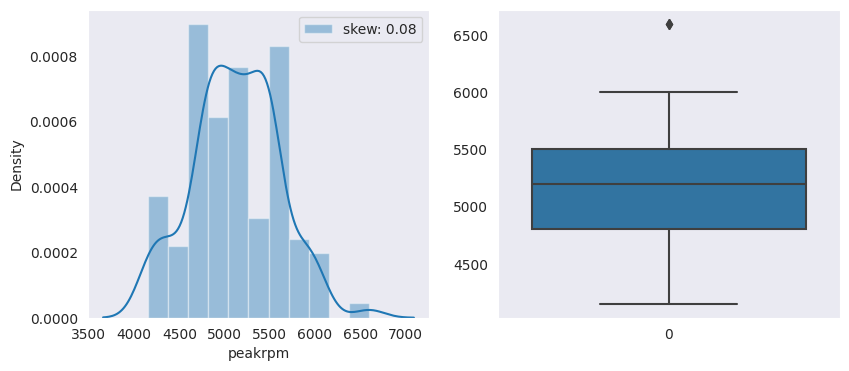

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


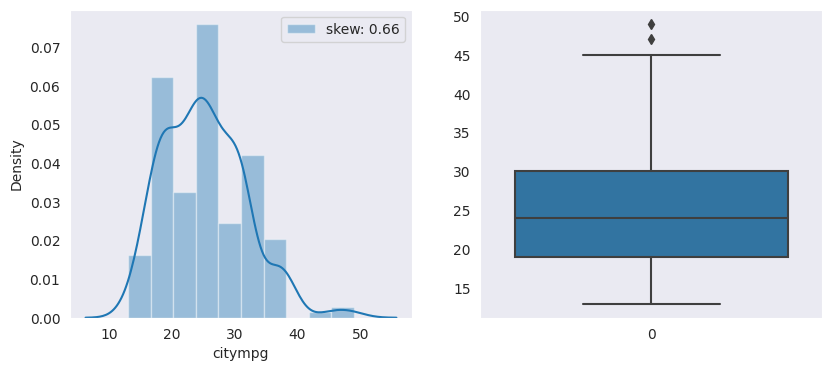

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


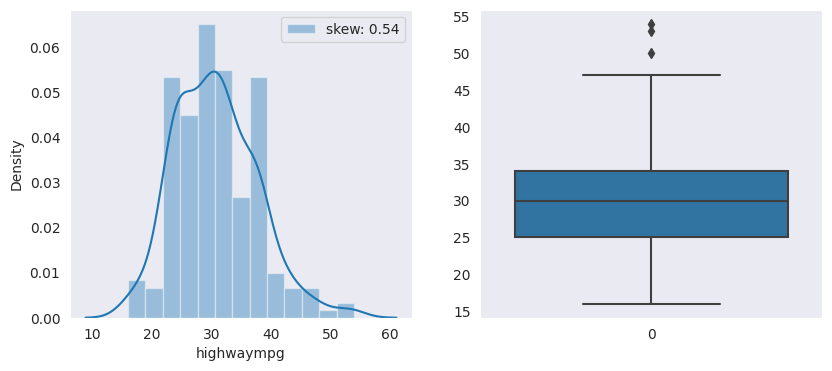

<ipython-input-38-a36a92290744>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


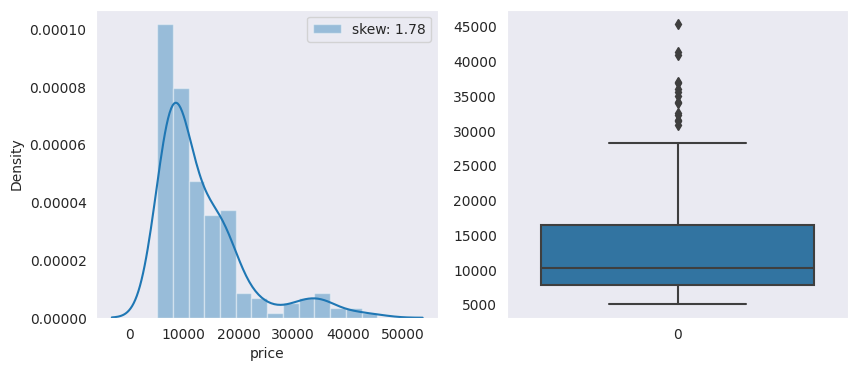

In [ ]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=cars
sns.set_style('dark')
for col in cars.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    #https://seaborn.pydata.org/generated/seaborn.boxplot.html  (whisker lenght is 1.5 times in interquartile range)
    sns.boxplot(df[col])
    plt.show()

In [ ]:
#Sample code in case someone wants to look at a particular column in more details
cars['enginesize'].quantile([0.05, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.05     90.00
0.25     97.00
0.50    120.00
0.90    181.00
0.95    201.20
0.96    209.00
0.97    231.00
0.98    256.08
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [ ]:
cars.nunique().sort_values(ascending=False)

car_ID              205
price               189
curbweight          171
carlength            75
horsepower           59
wheelbase            53
carheight            49
enginesize           44
carwidth             44
boreratio            38
stroke               37
compressionratio     32
highwaympg           30
citympg              29
peakrpm              23
car_company          22
fuelsystem            8
cylindernumber        7
enginetype            7
symboling             6
carbody               5
drivewheel            3
enginelocation        2
doornumber            2
aspiration            2
fueltype              2
dtype: int64

### If needed to treat outlier then use the below method :IQR

In [ ]:
#Lets first create copy of our data set that we can play around with

cars_copy = cars

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(cars['highwaympg'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [50, 53, 54]


In [ ]:
check_outliers_in=cars_copy['highwaympg']
sample_outliers = detect_outliers_iqr(check_outliers_in)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [50, 53, 54, 50, 53, 54]


In [ ]:
#For one variable at a time;

percentile25 = cars_copy['highwaympg'].quantile(0.25)
percentile75 = cars_copy['highwaympg'].quantile(0.75)
iqr= (percentile75 - percentile25)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
cars[cars['highwaympg'] > upper_limit]
#cars[cars['highwaympg'] < lower_limit]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
18,19,2,gas,std,two,hatchback,fwd,front,88.4,141.1,...,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet
30,31,2,gas,std,two,hatchback,fwd,front,86.6,144.6,...,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0,honda
90,91,1,diesel,std,two,sedan,fwd,front,94.5,165.3,...,idi,2.99,3.47,21.9,55,4800,45,50,7099.0,nissan


In [ ]:
#Trim Outliers (remove it)

cars_copy = cars_copy[cars_copy['highwaympg'] < upper_limit]
cars_copy.shape

(202, 26)

In [ ]:
#OR we can cap the outliers

cars_copy['highwaympg'] = np.where(cars_copy['highwaympg'] > upper_limit,upper_limit,
                                  np.where(cars_copy['highwaympg'] < lower_limit, lower_limit, cars_copy['highwaympg'] ))

In [ ]:
#Setting it up for multiple variables together

col_sel=['compressionratio','enginesize','carwidth','wheelbase']
def iqr_capping(df, cols, factor):

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

iqr_capping(cars_copy, col_sel, 1.5)

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


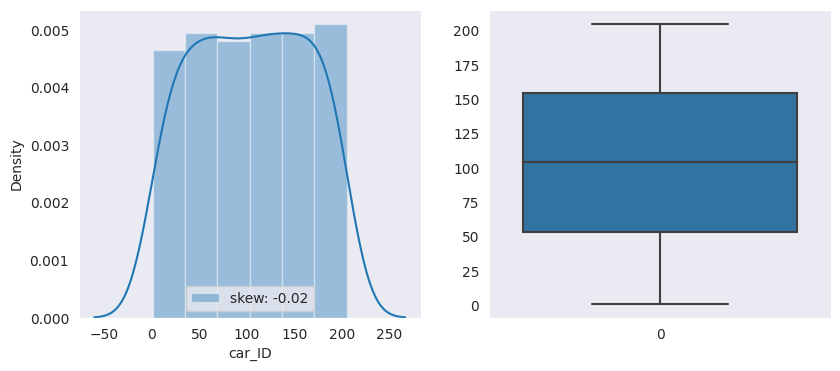

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


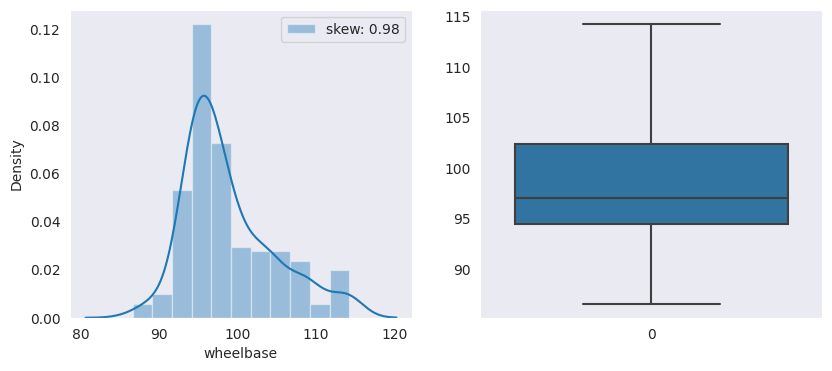

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


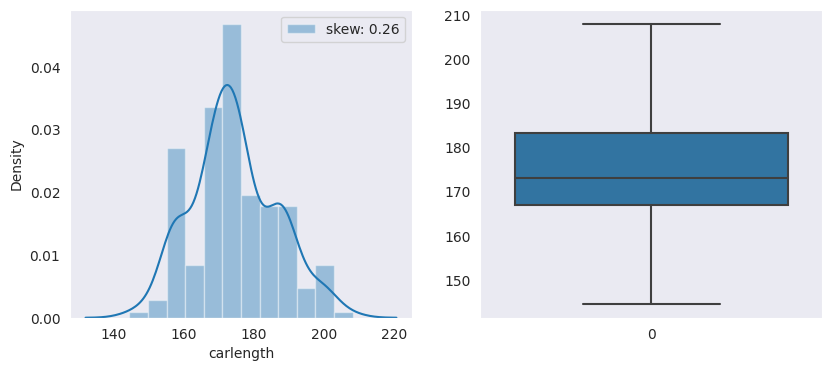

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


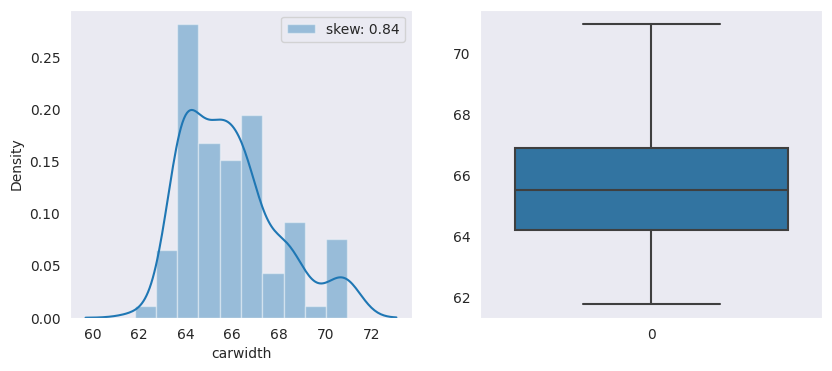

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


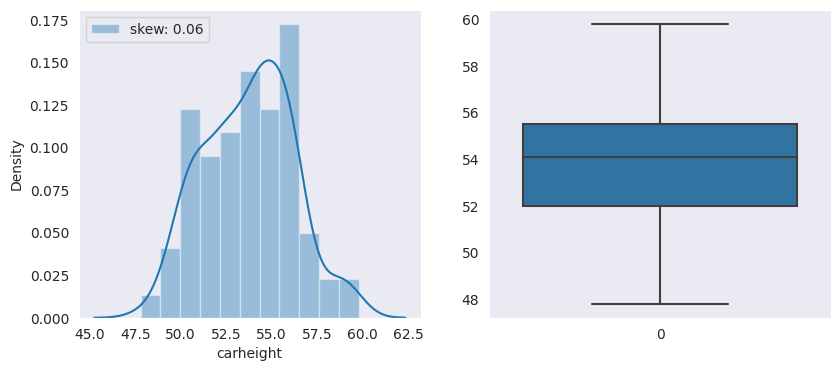

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


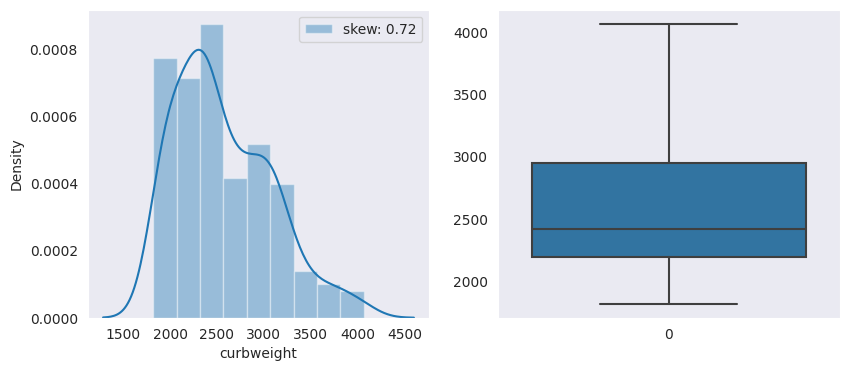

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


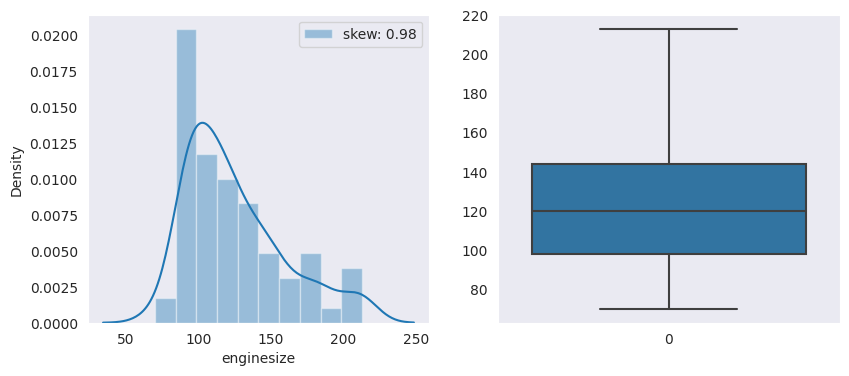

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


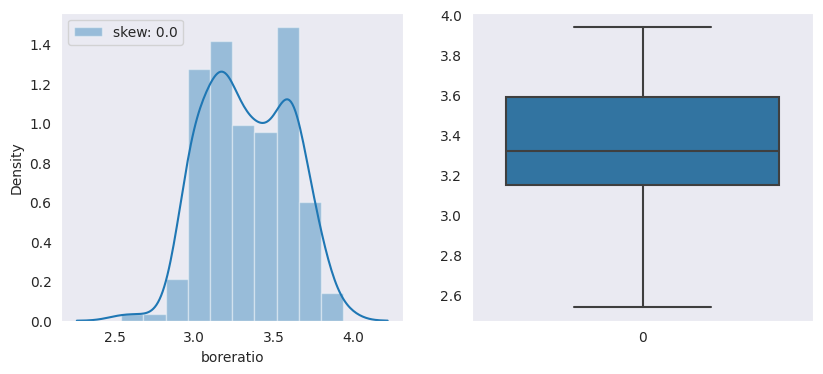

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


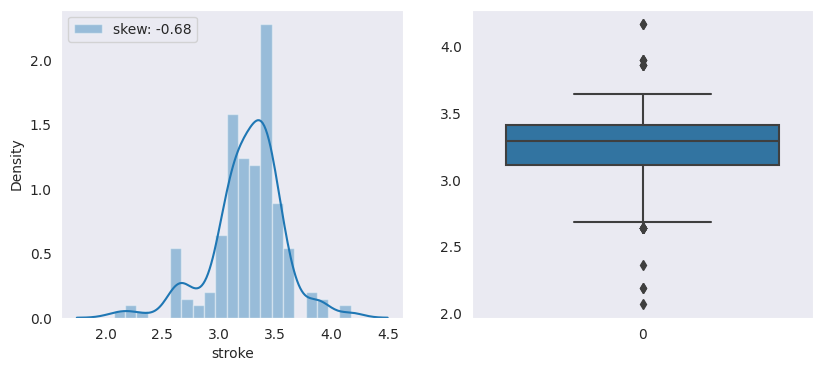

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


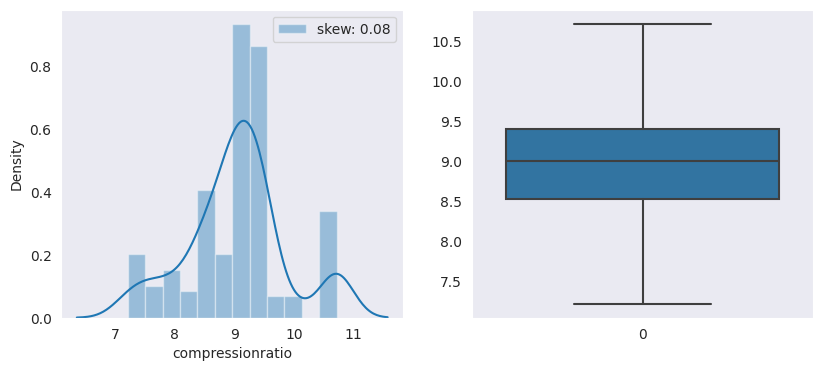

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


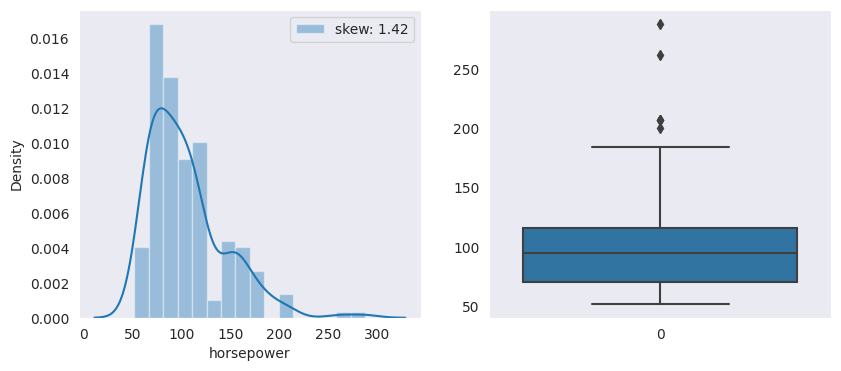

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


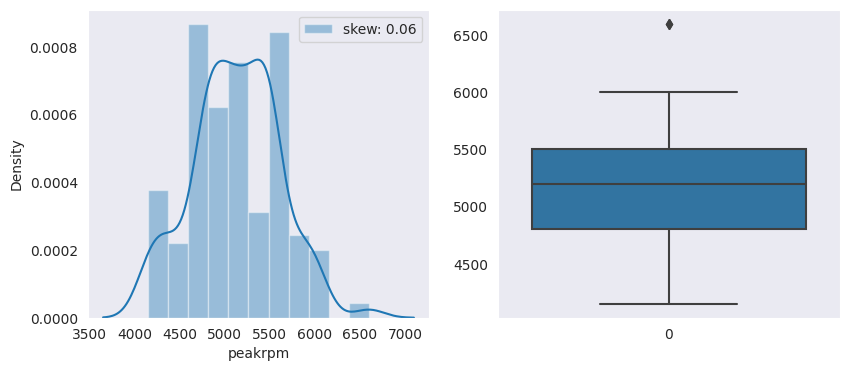

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


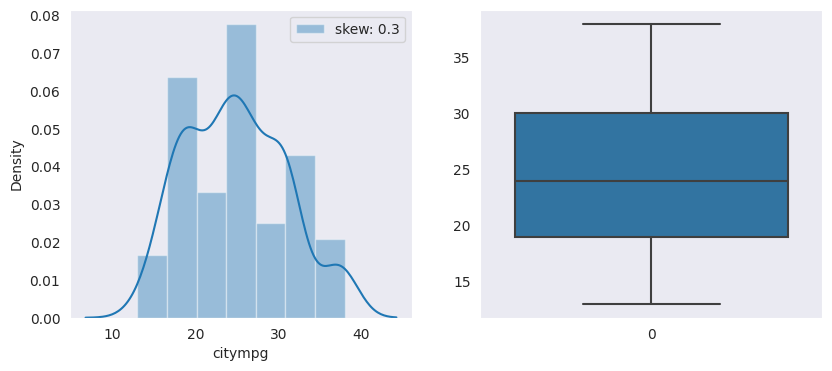

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


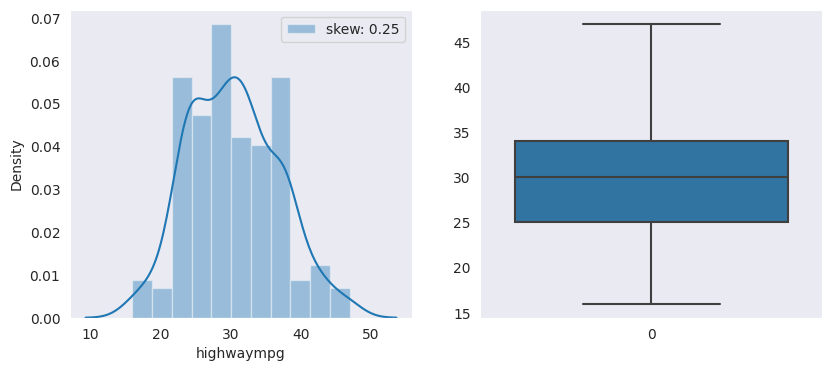

<ipython-input-48-82c07d271407>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


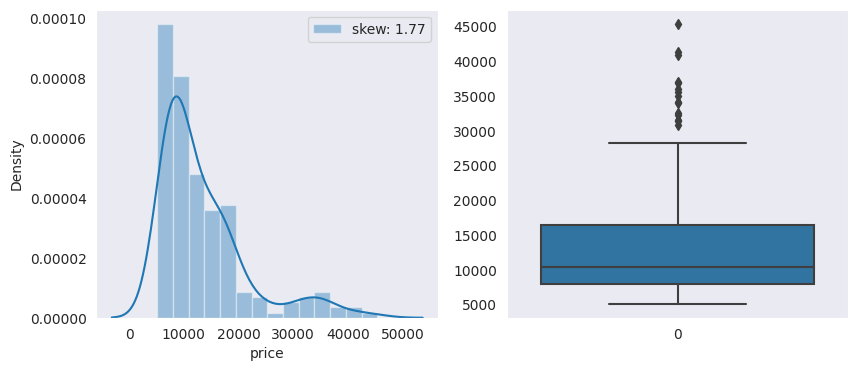

In [ ]:
#checking the boxplot again after doing the outlier treatment

# Ploting graph for each varables to understand outliers
from scipy import stats

df=cars_copy
sns.set_style('dark')
for col in cars_copy.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    #https://seaborn.pydata.org/generated/seaborn.boxplot.html  (whisker lenght is 1.5 times in interquartile range)
    sns.boxplot(df[col])
    plt.show()

## 3. Data Preparation


#### Data Preparation

Let's now prepare the data and build the model.

In [ ]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

Y  = cars['price']


In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables
X = X.drop(list(cars_categorical.columns), axis=1)

In [ ]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

### VIF calculation

In [ ]:
# The generally accepted cut-off for VIF is 2.5, with higher values denoting levels of multicollinearity
# that could negatively impact the regression model.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [ ]:
calc_vif(X).round(1).sort_values(by='VIF', ascending=False)

,variables,VIF
27,enginelocation_rear,inf
39,cylindernumber_two,inf
31,enginetype_ohcf,inf
64,car_company_subaru,inf
37,cylindernumber_three,inf
29,enginetype_l,inf
59,car_company_peugeot,inf
33,enginetype_rotor,inf
18,fueltype_gas,13990.2
42,fuelsystem_idi,1918.8


In [ ]:
X = X.drop(['enginelocation_rear','cylindernumber_two','enginetype_ohcf','car_company_subaru',
            'cylindernumber_three','enginetype_l','car_company_peugeot','enginetype_rotor'],axis=1)

vif_values = calc_vif(X).round(1).sort_values(by='VIF', ascending=False)

KeyError: ignored

In [ ]:
vif_values_greater_than_20 = vif_values[vif_values['VIF']>20]
vif_values_greater_than_20

,variables,VIF
18,fueltype_gas,13048.3
36,fuelsystem_idi,1861.2
8,compressionratio,205.3
11,citympg,49.5
9,horsepower,47.4
5,enginesize,43.5
4,curbweight,42.3
12,highwaympg,41.4
38,fuelsystem_mpfi,40.7
14,symboling_0,34.0


In [ ]:
X = X.drop(vif_values_greater_than_20['variables'],axis=1)
X.shape

(205, 44)

In [ ]:
vif_values = calc_vif(X).round(1).sort_values(by='VIF', ascending=False)
vif_values_greater_than_20 = vif_values[vif_values['VIF']>20]
vif_values_greater_than_20

,variables,VIF
1,carwidth,3800.1
0,wheelbase,2472.1
2,carheight,1738.8
3,boreratio,632.6
4,stroke,488.6
5,peakrpm,366.4
16,enginetype_ohc,33.2
11,carbody_sedan,27.9
13,drivewheel_fwd,21.4


In [ ]:
X = X.drop(vif_values_greater_than_20['variables'],axis=1)
X.shape

(205, 35)

In [ ]:
vif_values = calc_vif(X).round(1).sort_values(by='VIF', ascending=False)
vif_values_greater_than_20 = vif_values[vif_values['VIF']>20]
vif_values_greater_than_20

,variables,VIF


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,test_size = 0.2, random_state=100)

In [ ]:
X_train.head()

,symboling_-1,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_rwd,enginetype_dohcv,enginetype_ohcv,cylindernumber_five,...,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_toyota,car_company_volkswagen,car_company_volvo
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
Y_train.head()

3      13950.0
157     7198.0
81      8499.0
32      5399.0
99      8949.0
Name: price, dtype: float64

In [ ]:
X_train.shape

(164, 35)

## 3. Model Building and Evaluation

In [ ]:
# fitting a linear model
import statsmodels.api as sm

#adding a constant
X_train = sm.add_constant(X_train)

#performing the regression
model = sm.OLS(Y_train,X_train).fit()

In [ ]:
X_train.shape

(164, 36)

In [ ]:
# Result of statsmodels
# OLS = Ordinary least squares
#No. Observations = Number of obeservations in train data = 164
#Df residuals = n - (k+1) = 164 - (df model +1)
#df model = In general equals to number of variables
#"const" term: The constant terms is the intercept of the regression line
# std error: std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
# t value: (coef/SD)
# P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
# Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

#More details on how to read these results: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/#:~:text=Degree%20of%20freedom(df)%20of,sum%20of%20squares%20is%20calculated.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     35.08
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           5.50e-50
Time:                        12:48:43   Log-Likelihood:                -1511.6
No. Observations:                 164   AIC:                             3091.
Df Residuals:                     130   BIC:                             3197.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9062

In [ ]:
 from statsmodels.tools.eval_measures import rmse
# fit your model which you have already done

# now generate predictions
ypred = model.predict(X_train)

# calc rmse
rmse = rmse(Y_train, ypred)
rmse

2436.409896334003

In [ ]:
model.rsquared

0.8990444128186312

In [ ]:
model.pvalues.round(3).sort_values(ascending=False)

carbody_wagon             0.991
carbody_hardtop           0.989
fuelsystem_4bbl           0.936
car_company_mercury       0.791
cylindernumber_five       0.746
car_company_honda         0.743
car_company_mazda         0.658
fuelsystem_spdi           0.644
car_company_renault       0.552
car_company_mitsubishi    0.539
doornumber_two            0.448
car_company_volkswagen    0.375
symboling_-1              0.301
cylindernumber_twelve     0.248
car_company_chevrolet     0.236
car_company_nissan        0.233
car_company_isuzu         0.231
car_company_volvo         0.224
fuelsystem_spfi           0.206
enginetype_dohcv          0.206
carbody_hatchback         0.193
car_company_toyota        0.187
car_company_plymouth      0.176
fuelsystem_mfi            0.125
car_company_dodge         0.123
enginetype_ohcv           0.098
car_company_saab          0.001
aspiration_turbo          0.001
car_company_porsche       0.000
const                     0.000
car_company_jaguar        0.000
car_comp

In [ ]:
model.params.round(1)

const                      9062.7
symboling_-1               1047.5
aspiration_turbo           2627.9
doornumber_two             -495.8
carbody_hardtop             -21.8
carbody_hatchback          -917.1
carbody_wagon                -8.2
drivewheel_rwd             4163.1
enginetype_dohcv           4213.9
enginetype_ohcv            2563.9
cylindernumber_five        -561.1
cylindernumber_six         4851.0
cylindernumber_twelve      4882.8
fuelsystem_4bbl            -153.6
fuelsystem_mfi             4590.1
fuelsystem_spdi             745.0
fuelsystem_spfi               0.0
car_company_audi           8800.4
car_company_bmw            9857.1
car_company_buick         14699.3
car_company_chevrolet     -2113.8
car_company_dodge         -1903.8
car_company_honda          -373.4
car_company_isuzu         -2079.2
car_company_jaguar        15823.2
car_company_mazda           485.7
car_company_mercury           0.0
car_company_mitsubishi     -854.4
car_company_nissan        -1262.6
car_company_pl

In [ ]:
Coef_df=pd.DataFrame(zip(x_train.columns,lm.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
1,315.072,-200.759,1059.96,-94.8709,3.13772,78.15,-3464.29,-1880.97,-1071.99,12.2965,...,-2677.49,-4016.71,-4217.36,3661.57,-2296.03,818.662,-6905.75,-3672.72,-2396.58,-1375.17


In [ ]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[[-1.50817826e-16  3.40005801e-16  4.68375339e-17  1.07552856e-16
  -3.46944695e-17 -2.51534904e-16  1.90819582e-16 -1.64798730e-17
  -1.63064007e-16  1.10154941e-16 -6.93889390e-17 -4.68375339e-17
   9.36750677e-17 -7.63278329e-17  1.91686944e-16  1.90819582e-16
   7.63278329e-17  1.38777878e-16  8.02756971e-05 -9.19403442e-17
   6.15826834e-17 -2.16840434e-17 -8.41340886e-17 -8.67361738e-18
  -1.21430643e-17  9.36750677e-17  3.90312782e-17 -1.39423878e-05
   5.94142791e-17 -1.13702942e-04 -7.97972799e-17  3.02359262e-05
  -4.25007252e-17 -2.38094260e-04  4.38017678e-17  1.63064007e-16
   1.44415729e-16  1.27652818e-05  4.33680869e-17 -1.28390262e-04
  -5.63785130e-17  3.18173441e-04  8.02756971e-05  1.54734042e-05
  -3.46944695e-17  3.81639165e-17 -2.77555756e-17  1.37043155e-16
   1.51788304e-16  1.83880688e-16  1.82145965e-16  2.22911967e-16
   2.45029691e-16  9.49761103e-17  1.66533454e-16  1.70002901e-16
  -1.04083409e-17  1.63064007e-16  1.70002901e-16  1.09143941e-04
   8.52182

In [ ]:
# Get all the model performace parameters
# we can get train error

y_train_pred=lm.predict(x_train)

from sklearn import metrics

mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = lm.score(x_train, y_train)
# lm.score(x_train,y_train) same as above
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 983.507076133361 mean_l2_error_train is 1527590.920719487 Rootmean_l2_error_train is 1235.9574914694626 and accuracy is 0.975438833918463


In [ ]:
# model parameters and annova
x_train_final=sm.add_constant(x_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     59.25
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.77e-53
Time:                        19:56:23   Log-Likelihood:                -1306.4
No. Observations:                 153   AIC:                             2737.
Df Residuals:                      91   BIC:                             2925.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.22

In [ ]:
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['price_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,price,price_predict
0,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,...,0,0,0,0,0,0,0,0,24565.0,24238.724551
1,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70,...,0,0,0,0,0,1,0,0,9258.0,7971.426137
2,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,...,0,0,0,0,0,0,0,0,8845.0,9879.405268
3,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,...,0,0,0,0,0,0,0,0,6295.0,5964.326277
4,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,...,0,0,0,0,0,1,0,0,11248.0,9987.479896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,99.1,186.6,66.5,56.1,2695,121,3.54,3.07,9.3,110,...,0,0,0,1,0,0,0,0,12170.0,13773.753591
149,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,160,...,0,0,0,1,0,0,0,0,18620.0,16635.231361
150,96.6,180.3,70.5,50.8,3685,234,3.46,3.10,8.3,155,...,0,0,0,0,0,0,0,0,35056.0,36227.051586
151,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,...,0,0,0,0,1,0,0,0,7603.0,6923.587479


In [ ]:
# Get the model tested on test data

y_test_pred=lm.predict(x_test)

from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)
# Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

test_accuracy = lm.score(x_test, y_test)
print(pd.DataFrame(zip(x_test,y_test,y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

                        0        1             2
0               wheelbase   6669.0   6011.783136
1               carlength   7999.0   6045.363991
2                carwidth   6338.0   6725.170137
3               carheight   8916.5   7358.295435
4              curbweight  10295.0   5562.482009
5              enginesize  25552.0  28990.567833
6               boreratio   8249.0   6211.690054
7                  stroke   5151.0  -2962.710552
8        compressionratio   6488.0   7876.030749
9              horsepower  10245.0  11200.809925
10                peakrpm  17450.0  16491.249193
11                citympg  17669.0  14037.404806
12             highwaympg  16515.0  14636.902089
13           symboling_-1   9095.0   8250.305164
14            symboling_0  12964.0  10341.592497
15            symboling_1  11199.0  11007.689750
16            symboling_2   9980.0   8128.803907
17            symboling_3   6529.0   8358.239740
18           fueltype_gas  18150.0  14515.848188
19       aspiration_

In [ ]:
DF_y_test_pred=pd.DataFrame(y_test_pred,columns=['price_predict'])
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([x_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,price,price_predict
0,93.7,157.3,64.4,50.8,2004,92,2.97,3.230,9.4,68,...,0,0,0,0,0,0,0,0,6669.0,6011.783136
1,94.5,170.2,63.8,53.5,2037,97,3.15,3.290,9.4,69,...,0,0,0,0,0,0,0,0,7999.0,6045.363991
2,95.7,158.7,63.6,54.5,2040,92,3.05,3.030,9.0,62,...,0,0,0,0,0,1,0,0,6338.0,6725.170137
3,94.5,155.9,63.6,52.0,1874,90,3.03,3.110,9.6,70,...,0,0,0,0,0,0,0,0,8916.5,7358.295435
4,96.5,175.4,62.5,54.1,2372,110,3.15,3.580,9.0,86,...,0,0,0,0,0,0,0,0,10295.0,5562.482009
5,110.0,190.9,70.3,56.5,3515,183,3.58,3.640,21.5,123,...,0,0,0,0,0,0,0,0,25552.0,28990.567833
6,95.1,162.4,63.8,53.3,2008,97,3.15,3.290,9.4,69,...,0,0,0,0,0,0,0,0,8249.0,6211.690054
7,88.4,141.1,60.3,53.2,1488,61,2.91,3.030,9.5,48,...,0,0,0,0,0,0,0,0,5151.0,-2962.710552
8,95.7,158.7,63.6,54.5,2015,92,3.05,3.030,9.0,62,...,0,0,0,0,0,1,0,0,6488.0,7876.030749
9,98.8,177.8,66.5,55.5,2410,122,3.39,3.390,8.6,84,...,0,0,0,0,0,0,0,0,10245.0,11200.809925


In [ ]:
#Few Imp codes:

#1. How to rename a column: df.rename(columns={'city':'city_new'},inplace=True)
#2. Describe method of looking at summary of columns: df.describe()
#3. checking number of nulls in columns: df.isnull().sum()
#4. Find out the number of values which are not numeric: df['price'].str.isnumeric().value_counts()
#5. List out the values which are not numeric: df['price'].loc[df['price'].str.isnumeric() == False]
